# Matplotlib 3: Statistical Plots

In this lesson, we are going to know how to create statistical plots.

In [1]:
# improt packages
import pandas as pd
import matplotlib.pyplot as plt

## Bar Plot

In this section, we will work with **Iran's Female Students** in uninversities of Iran in different educational years.
Let's read the data and see how it looks like.

In [2]:
iran_female_edu_df = pd.read_csv(
    "./data/iran-female-eduction.csv",
    index_col='Edu Year',
    dtype={
        'Total':'int32',
        'Higher Diploma': 'int32',
        'Bachelor': 'int32',
        'Professional Doctorate and PhD': 'int32',
    },
)

In [3]:
iran_female_edu_df.head()

Total  Higher Diploma  Bachelor  Master  \
Edu Year                                              
1386-87   1456126          316690   1045731   60718   
1387-88   1688223          279155   1296253   79079   
1388-89   1874722          391429   1333387  109467   
1389-90   2037875          395983   1460382  136386   
1390-91   2202685          383434   1578717  191160   

          Professional Doctorate and PhD  
Edu Year                                  
1386-87                            32987  
1387-88                            33736  
1388-89                            40439  
1389-90                            45124  
1390-91                            49374

The numbers in each columns represents the number of students in that level of education in given Edu Year.     
Let's use bar chart to visualize this information using Matplotlib. To draw a bar chart we will use `ax.bar()` method.

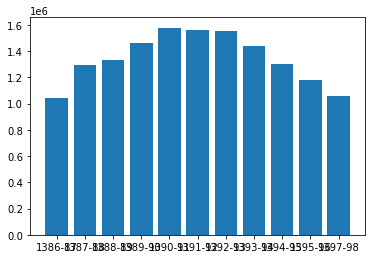

In [4]:
# Example 1: simple bar chart
fig, ax = plt.subplots()

# plot a bar chart
ax.bar(iran_female_edu_df.index, iran_female_edu_df['Bachelor'])

plt.show()

What is wroing with this plot?
The plot x-axis ticks have gone through each other. To solve this problem we will rotate the x-axis ticks by 90 degrees. Matplotlib's `ax.set_xtickslabel()` is what wee need to use.

<ipython-input-5-b28b317ac898>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(iran_female_edu_df.index, rotation=90)


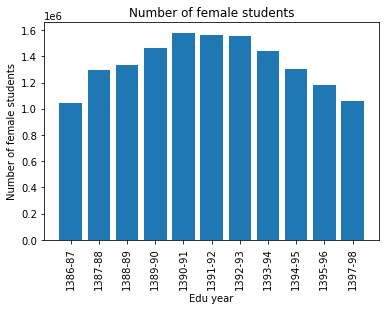

In [5]:
# Example 2: simple bar chart with ticks labels
fig, ax = plt.subplots()

# plot a bar chart
ax.bar(iran_female_edu_df.index, iran_female_edu_df['Bachelor'])
# rotate x-axis labels
ax.set_xticklabels(iran_female_edu_df.index, rotation=90)

# add labels to plot
ax.set_title('Number of female students')
ax.set_xlabel('Edu year')
ax.set_ylabel('Number of female students')

plt.show()

## Stacked Bar Chart

In previous example, we had a bar plot which showed the number of **Bachelor** female students in different Edu years. In this section, we show an example in which Bachelor, Master and PhD are all drawn as stacked bar chart.

<ipython-input-6-e20c8f852652>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(iran_female_edu_df.index, rotation=90)


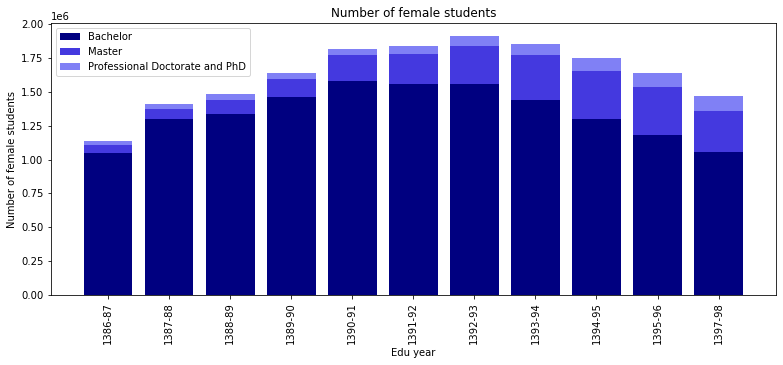

In [6]:
# Example 3: stacked bar chart
fig, ax = plt.subplots(figsize=(13,5))

# plot stacked bar chart
# plot bachelor bars at the bottom of all bars
ax.bar(
    iran_female_edu_df.index,
    iran_female_edu_df['Bachelor'],
    label='Bachelor',
    color='navy',
)
# plot master bars ot the top of bachelor bars
ax.bar(
    iran_female_edu_df.index,
    iran_female_edu_df['Master'],
    bottom = iran_female_edu_df['Bachelor'],
    label='Master',
    color='#4439df',
)
# plot phd and professional doctorate on top of the master bars
ax.bar(
    iran_female_edu_df.index,
    iran_female_edu_df['Professional Doctorate and PhD'],
    bottom = iran_female_edu_df['Bachelor'] + iran_female_edu_df['Master'],
    label='Professional Doctorate and PhD',
    color='#8080F5',
)

# rotate x-axis labels
ax.set_xticklabels(iran_female_edu_df.index, rotation=90)

# add labels to plot
ax.set_title('Number of female students')
ax.set_xlabel('Edu year')
ax.set_ylabel('Number of female students')

# add legends
ax.legend()

plt.show()

Let's plot another barchart which shows the mean of each education levels over all years. In this plot, we use annotations to show the number of each bar on top of the bar.

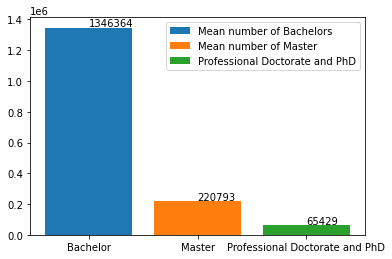

In [7]:
# Example 4: bar chart for mean of each education level
fig, ax = plt.subplots()

# add bars
ax.bar(
    'Bachelor',
    iran_female_edu_df['Bachelor'].mean(),
    label='Mean number of Bachelors',
)
ax.bar(
    'Master',
    iran_female_edu_df['Master'].mean(),
    label='Mean number of Master',
)
ax.bar(
    'Professional Doctorate and PhD',
    iran_female_edu_df['Professional Doctorate and PhD'].mean(),
    label='Professional Doctorate and PhD',
)

# annotate bars
ax.annotate(
    str(int(iran_female_edu_df['Bachelor'].mean())),
    xy=['Bachelor', iran_female_edu_df['Bachelor'].mean()*1.008],
)
ax.annotate(
    str(int(iran_female_edu_df['Master'].mean())),
    xy=['Master', iran_female_edu_df['Master'].mean()*1.008],
)
ax.annotate(
    str(int(iran_female_edu_df['Professional Doctorate and PhD'].mean())),
    xy=['Professional Doctorate and PhD', iran_female_edu_df['Professional Doctorate and PhD'].mean()*1.008],
)

plt.legend()
plt.show()

## Bars with error bars

The bars especially in science may have error bars which shows the uncertainty of the values each bar shows. Matplotlib `ax.bar()` method has `yerr` parameter which adds error bars to a bar.

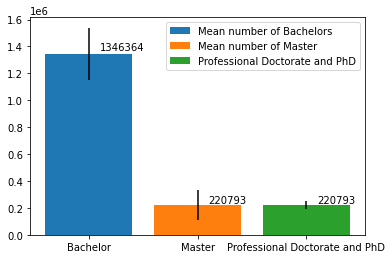

In [8]:
# Example 4: bar chart for mean of each education level with errors
fig, ax = plt.subplots()

# find values and error of each bar
bsc_mean = iran_female_edu_df['Bachelor'].mean()
bsc_std = iran_female_edu_df['Bachelor'].std()
msc_mean = iran_female_edu_df['Master'].mean()
msc_std = iran_female_edu_df['Master'].std()
phd_mean = iran_female_edu_df['Master'].mean()
phd_std = iran_female_edu_df['Professional Doctorate and PhD'].std()

# add bars
ax.bar(
    'Bachelor',
    bsc_mean,
    yerr=bsc_std,
    label='Mean number of Bachelors',
)
ax.bar(
    'Master',
    msc_mean,
    yerr=msc_std,
    label='Mean number of Master',
)
ax.bar(
    'Professional Doctorate and PhD',
    phd_mean,
    yerr=phd_std,
    label='Professional Doctorate and PhD',
)

# annotate bars
ax.annotate(
    str(int(bsc_mean)),
    xy=[0.1, bsc_mean*1.02],
)
ax.annotate(
    str(int(msc_mean)),
    xy=[1.1, msc_mean*1.05],
)
ax.annotate(
    str(int(phd_mean)),
    xy=[2.1, phd_mean*1.05],
)

plt.legend()
plt.show()

## Histogram

In this section, we learn about histograms. Histogram plots shows the distribution of possible values for a random variable.

Olympic 2016 dataset is what we use in this section for our visualizations. Let's read `Name`, `Height` and `Sex` Columns from this dataset.

In [9]:
olympic_df = pd.read_csv('./data/olympic_2016.csv', usecols=['Name', 'Height', 'Sex'])

Now, let's plot the histogram of athletes' Heights to see the distribution of Olympic athletes heights'. We use ax.hist() to draw a histogram.

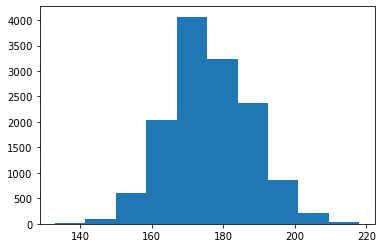

In [10]:
# Example 5: histogram of heights of all athletes
fig, ax = plt.subplots()

# create histogram of heights
ax.hist(olympic_df['Height'])

plt.show()

The `bins` parameter  in `ax.hist()` determines the bins of the histogram. If it is a integer, then Matplotlib automatically calculcates the edges of bins and creates a plot with given number of bins.

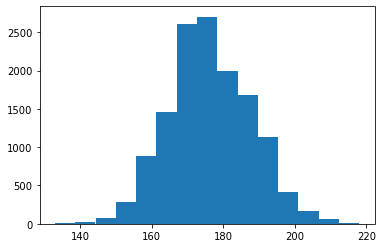

In [11]:
# Example 5: histogram of heights of all athletes with bins = 15
fig, ax = plt.subplots()

# create histogram of heights
ax.hist(olympic_df['Height'], bins=15)

plt.show()

It `bins` parameter is a list, then Matplotlib creates a histogram where edges are what given in the list.

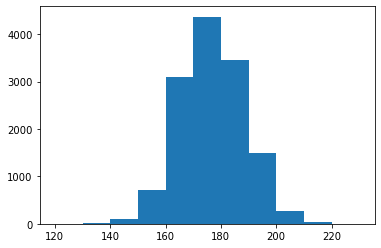

In [12]:
# Example 5: histogram of heights of all athletes with bins = 12
fig, ax = plt.subplots()

# create histogram of heights
ax.hist(olympic_df['Height'], bins=[120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230])

plt.show()

Now, we plot two histograms in same plot. What we are interested is to compare distribution of heights among male and female athletes. To do this we can plot their histogram together in one plot as follows:

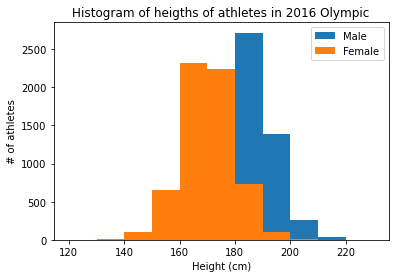

In [13]:
# Example 6: plot two histograms in same subplot
fig, ax = plt.subplots()

# create two histogram of heights
# males heights
ax.hist(
    olympic_df[olympic_df['Sex']=='M']['Height'],
    bins=[120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230],
    label='Male'
)
# female heights
ax.hist(
    olympic_df[olympic_df['Sex']=='F']['Height'],
    bins=[120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230],
    label='Female'
)

# set labels
ax.set_title("Histogram of heigths of athletes in 2016 Olympic")
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of athletes")

ax.legend()
plt.show()

What is wrong with this plot? Since all histograms are filled with colors, it is not possible to see the distribution of male athletes completely. To overcome this challenge, we set `histtype='setp'` parameter

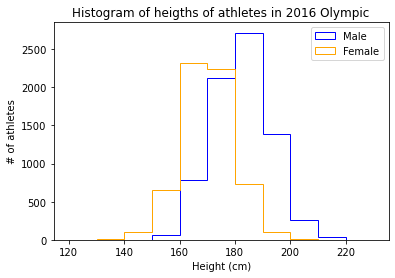

In [14]:
# Example 7: plot two histograms in same subplot
fig, ax = plt.subplots()

# create two histogram of heights
# males heights
ax.hist(
    olympic_df[olympic_df['Sex']=='M']['Height'],
    bins=[120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230],
    label='Male',
    histtype='step',
    color='blue',
)
# female heights
ax.hist(
    olympic_df[olympic_df['Sex']=='F']['Height'],
    bins=[120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230],
    label='Female',
    histtype='step',
    color='orange',
)

# set labels
ax.set_title("Histogram of heigths of athletes in 2016 Olympic")
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of athletes")

ax.legend()
plt.show()

Now, we can both distributions completely at the same plot. As we see, the height of male athletes in average is about 20 cm bigger than height of female athletes.

## Box plot

Box plot is one of the inenvtions of the John Tukey a great statistician. The box plot contains information about distribution of a variable. It can be used to compare distribution of two variables and also find outliers of each distribution.

To learn more about boxplots see [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51). The follwoing image is get from that link.

![img](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

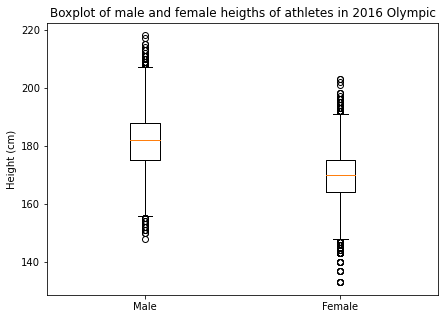

In [15]:
# Example 8: boxplot
fig, ax = plt.subplots(figsize=(7,5))

# create boxplot of heights of males and females
ax.boxplot(
    x=[
        olympic_df[olympic_df['Sex']=='M']['Height'].dropna(),
        olympic_df[olympic_df['Sex']=='F']['Height'].dropna(),
    ],
)

# set ticks labels
ax.set_xticklabels(
    ['Male', 'Female']
)

# set labels
ax.set_title("Boxplot of male and female heigths of athletes in 2016 Olympic")
ax.set_ylabel("Height (cm)")


plt.show()

## Scatter plot

Scatter plots are used when we want to compare to variables and see how they are correlated to each other. In this section, we learn how to plot scatter plots using Matplotlib. We will use **global_warming** data.

In [16]:
global_warming_df = pd.read_csv('./data/global-warming.csv', parse_dates=True, index_col='date').dropna()
global_warming_df.sort_index(inplace=True)
global_warming_df

mean temperature  co2 (ppm)
date                                   
1958-03-06              0.10     315.69
1958-04-06              0.01     317.45
1958-05-06              0.08     317.50
1958-07-06              0.06     315.86
1958-08-06             -0.06     314.93
...                      ...        ...
2016-08-06              0.98     402.24
2016-09-06              0.87     401.01
2016-10-06              0.89     401.50
2016-11-06              0.93     403.64
2016-12-06              0.81     404.55

[701 rows x 2 columns]

We draw scatter plot of **mean temperature** vs **co2 (ppm)** using `ax.scatter()` method.

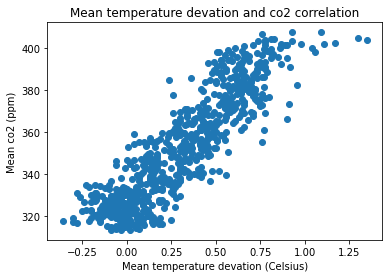

In [17]:
# Example 9: scatter plot of plot of mean temperature vs co2 (ppm)

fig, ax = plt.subplots()
ax.scatter(
    global_warming_df['mean temperature'],
    global_warming_df['co2 (ppm)'],
)

# set labels
ax.set_xlabel('Mean temperature devation (Celsius)')
ax.set_ylabel('Mean co2 (ppm)')
ax.set_title('Mean temperature devation and co2 correlation')


plt.show()

The plot shows a positive correlation which means that as long as the amount of co2 has increased the mean temperature deviation has also increased. However, the plot does not have any information about time. It is nice to see that whether by time the amount of co2 is increased or not. To add this information to this plot, we **encode** the time index of time series in color in `ax.scatter()`'s `c` parameter as follows:

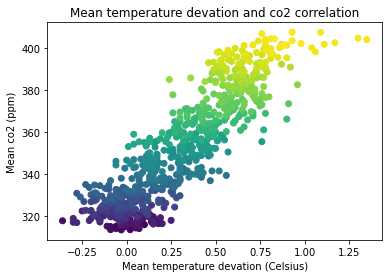

In [18]:
# Example 9: scatter plot of plot of mean temperature vs co2 (ppm)
fig, ax = plt.subplots()

# add scatter plot
ax.scatter(
    global_warming_df['mean temperature'],
    global_warming_df['co2 (ppm)'],
    c=global_warming_df.index,
)

# set labels
ax.set_xlabel('Mean temperature devation (Celsius)')
ax.set_ylabel('Mean co2 (ppm)')
ax.set_title('Mean temperature devation and co2 correlation')

plt.show()

Now, we see that as time passes the amount of co2 in atmosphere increases. We have encoded the time in colors of the sactter plot.

We can have two scatter plots in same plot. Let's do that for two datasets. The first dataset is the global warming data between **1970-01-01:1979-12-31** and the second dataset is between **2000-01-01:2009-12-31**.

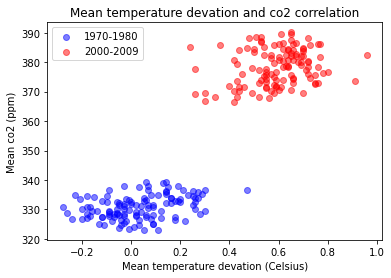

In [19]:
# create datasets
dataset_1 = global_warming_df['1970-01-01':'1979-12-31']
dataset_2 = global_warming_df['2000-01-01':'2009-12-31']

# create plot
fig, ax = plt.subplots()

# add scatter plot of dataset_1
ax.scatter(
    dataset_1['mean temperature'],
    dataset_1['co2 (ppm)'],
    color='blue',
    label='1970-1980',
    alpha=0.5,
)
ax.scatter(
    dataset_2['mean temperature'],
    dataset_2['co2 (ppm)'],
    color='red',
    label='2000-2009',
    alpha=0.5,
)

# set labels
ax.set_xlabel('Mean temperature devation (Celsius)')
ax.set_ylabel('Mean co2 (ppm)')
ax.set_title('Mean temperature devation and co2 correlation')

ax.legend()
plt.show()